WHO-COVID-19-global-daily-data

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

## NUMERICAL SOLUTION

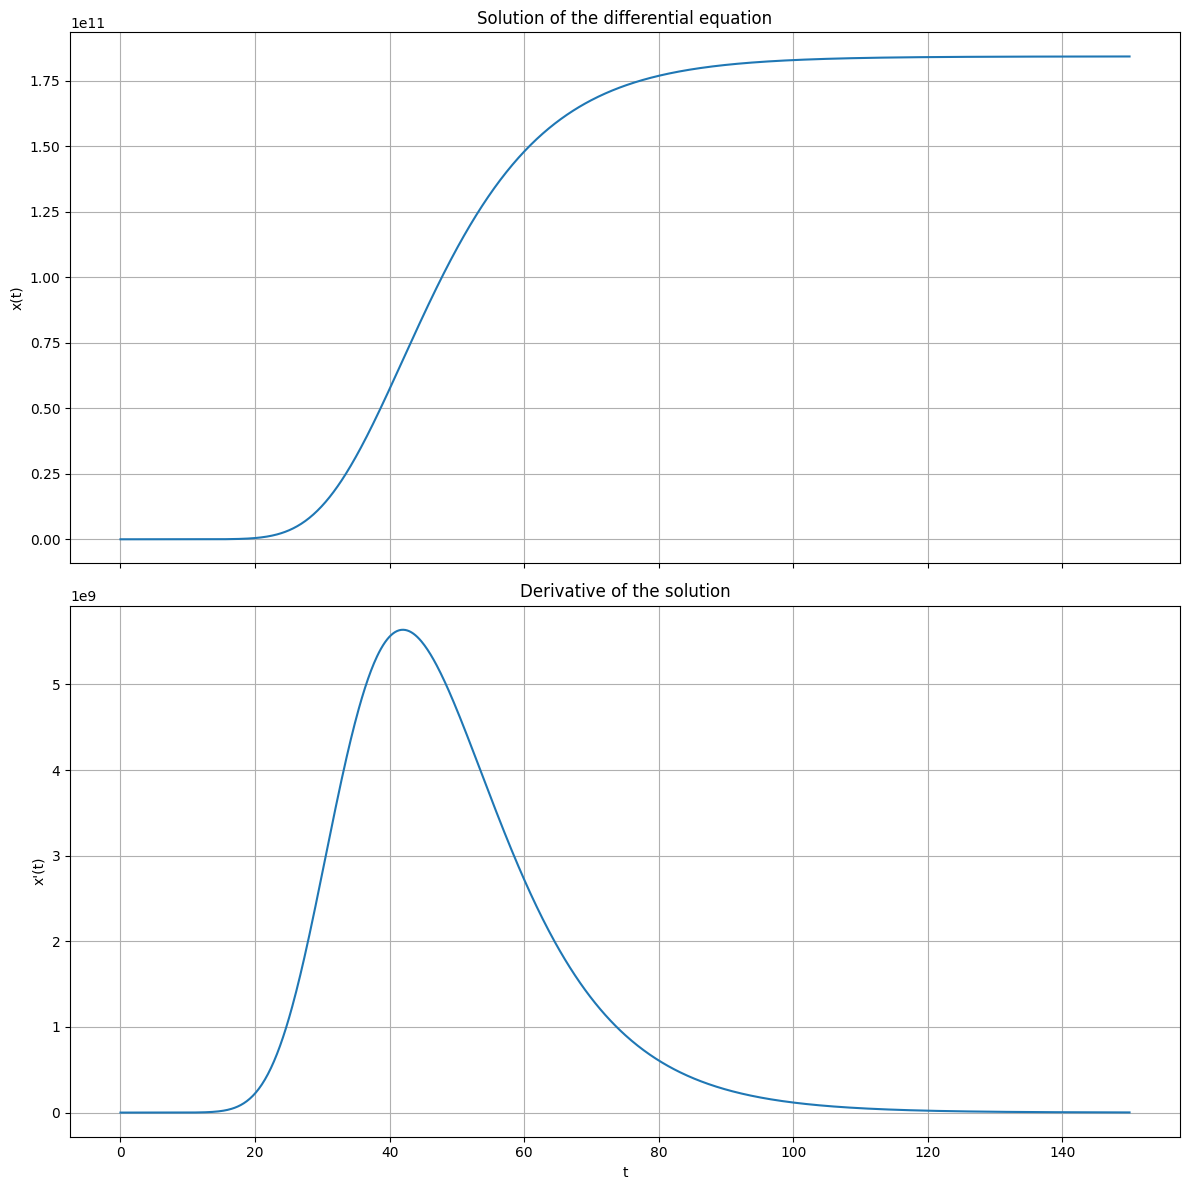

In [76]:
# define the model
def model(x, t, alpha_1, alpha_2, c):
    dxdt = alpha_1 * x + alpha_2 * x ** (1 + c)
    return dxdt

beta_1 = 0.94
beta_0 = 0.055
epsilon = 0.07

# parameters
alpha_1 = 4.2 #1+(1-beta_1)/epsilon
alpha_2 = -2.5 # -beta_0/epsilon
epsilon = 0.020 #epsilon

x0 = 1.0

# time points
t = np.linspace(0, 150, 1000)

# solve ODE
x = odeint(model, x0, t, args=(alpha_1, alpha_2, epsilon))

# compute derivative of solution
dxdt = alpha_1 * x + alpha_2 * x ** (1 + epsilon)

# create two subplots that share the same x-axis
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# plot the solution on the first subplot
axs[0].plot(t, x)
axs[0].set_ylabel('x(t)')
axs[0].set_title('Solution of the differential equation')
axs[0].grid()

# plot the derivative on the second subplot
axs[1].plot(t, dxdt)
axs[1].set_xlabel('t')
axs[1].set_ylabel("x'(t)")
axs[1].set_title("Derivative of the solution")
axs[1].grid()

# layout so plots do not overlap
fig.tight_layout()

plt.show()

## REAL DATA

In [9]:
df= pd.read_csv('data/WHO-COVID-19-global-daily-data.csv')


In [10]:
start_date = '2020-02-15'
end_date = '2020-07-15'

italy_df = df[(df['Country'] == 'Italy') & 
              (df['Date_reported'] >= start_date) & 
              (df['Date_reported'] <= end_date)]

In [31]:
italy_df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,145.000000,152.000000,145.000000,152.000000
mean,1680.965517,155078.460526,241.268966,21393.907895
std,1786.685049,93481.828072,254.790035,13799.592870
min,14.000000,3.000000,0.000000,0.000000
25%,255.000000,62729.750000,30.000000,5926.750000
50%,769.000000,204527.000000,133.000000,27824.500000
75%,3021.000000,234850.250000,431.000000,33859.250000
max,6557.000000,243743.000000,969.000000,34984.000000


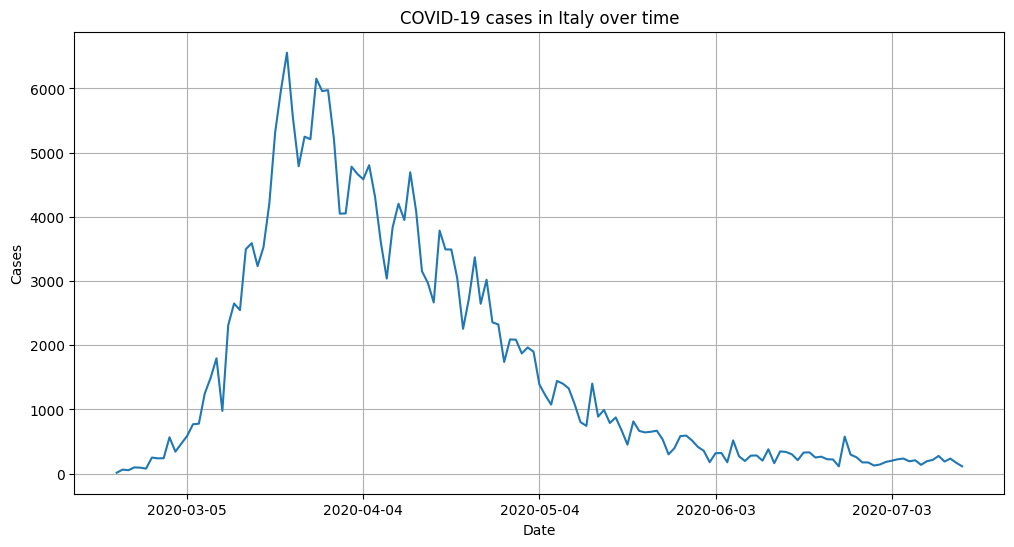

In [32]:
# Assuming 'date' is in datetime format, you can plot the data as follows:
import matplotlib.dates as mdates


plt.figure(figsize=(12,6))
plt.plot(italy_df['Date_reported'], italy_df['New_cases'])  # Replace 'cases' with the actual column name
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 cases in Italy over time')
plt.grid()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

plt.show()

## ALGEBRAIC SOLUTION

In [97]:
# Constants
alpha_1 = 4.4 #1+(1-beta_1)/epsilon
alpha_2 = -2.6 # -beta_0/epsilon
epsilon = 0.020 #epsilon

N0 = 1

V0 = N0**(-epsilon)
VSS = alpha_2/(1-alpha_1)

def V_func(t):
    return (V0-VSS)*np.exp(epsilon*(1-alpha_1)*t) + VSS

def V_prime_func(t):
    return epsilon*(1-alpha_1)*(V0-VSS)*np.exp(epsilon*(1-alpha_1)*t)

# Generate x values
x_values = np.linspace(0, 150, 100)  # Adjust range as needed
V_values = V_func(x_values)
V_prime_values = V_prime_func(x_values)

N_values = V_values**(-1/epsilon)
N_prime_values = -N_values*V_prime_values/(epsilon*V_values)


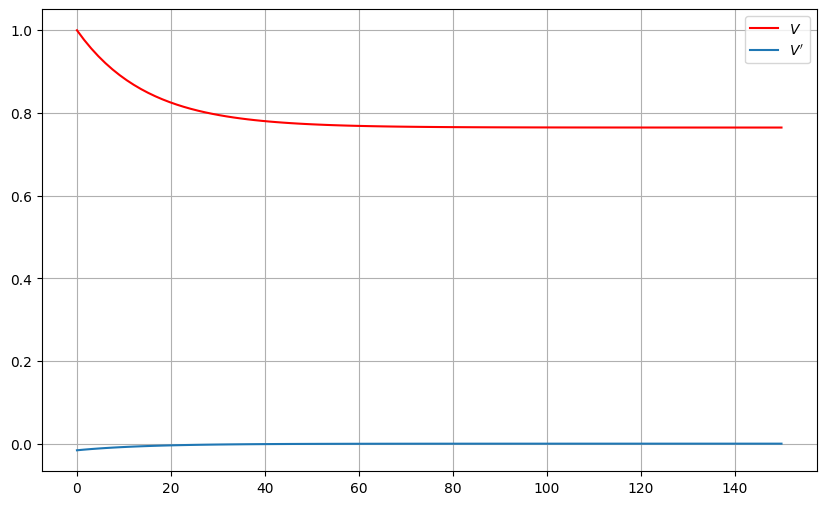

In [98]:
# Plotting V
plt.figure(figsize=(10, 6))
plt.plot(x_values, V_values, label=r'$V$', color='red')
plt.plot(x_values, V_prime_values, label=r"$V'$")
plt.grid()
plt.legend()
plt.show()

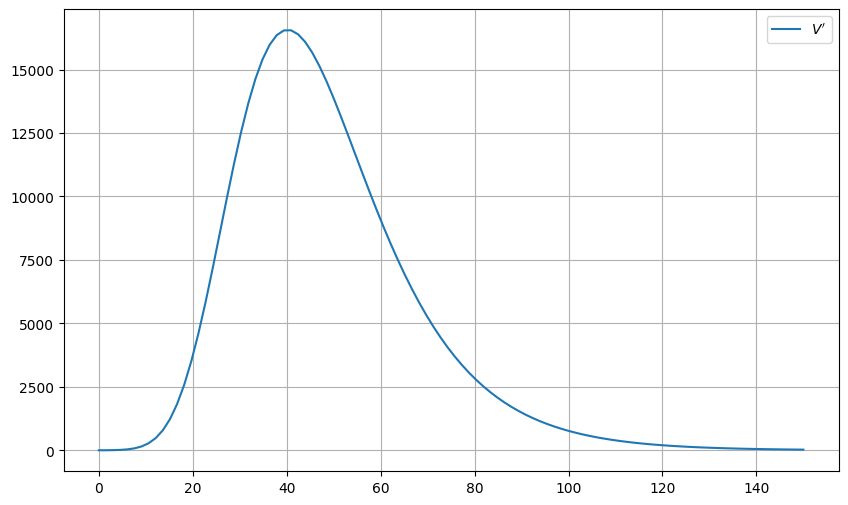

In [99]:
# Plotting N
plt.figure(figsize=(10, 6))
#plt.plot(x_values, N_values, label=r'$V$', color='red')
plt.plot(x_values, N_prime_values, label=r"$V'$")
plt.grid()
plt.legend()
plt.show()

## PLOT DATA + RESULTS

In [52]:
# From Stata

model_list =['N1 N2', 'N1 N2 N3', 'N1 N2 N3 N4', 'N1 N2 N3 N1lnN1']
alpha_1_list = [4.28, 7.05, 7.46, 7.50]
alpha_2_list = [-2.53, -4.98, -5.47, -5.47]
epsilon_list = [0.021, 0.016, 0.014, 0.014]

model_df = pd.DataFrame({
    'instruments': model_list,
    'alpha_1': alpha_1_list,
    'alpha_2': alpha_2_list,
    'epsilon': epsilon_list
})


In [56]:
# From Grid Search

model_list =['N1 N2', 'N1 N2 N3', 'N1 N2 N3 N4']
alpha_1_list = [3.409, 3.273, 3.545]
alpha_2_list = [-1.758, -1.636, -1.924]
epsilon_list = [0.0254, 0.0265, 0.0226]

model_df = pd.DataFrame({
    'instruments': model_list,
    'alpha_1': alpha_1_list,
    'alpha_2': alpha_2_list,
    'epsilon': epsilon_list
})

In [57]:
def N_prime_func(t_values, epsilon, alpha_1, alpha_2, N0=3):
    V0 = N0**(-epsilon)
    VSS = alpha_2/(1-alpha_1)
    
    def V_func(t):
        return (V0-VSS)*np.exp(epsilon*(1-alpha_1)*t) + VSS
    
    def V_prime_func(t):
        return epsilon*(1-alpha_1)*(V0-VSS)*np.exp(epsilon*(1-alpha_1)*t)
    
    # Generate x values
    V_values = V_func(t_values)
    V_prime_values = V_prime_func(t_values)
    
    N_values = V_values**(-1/epsilon)
    N_prime_values = -N_values*V_prime_values/(epsilon*V_values)
    
    return N_prime_values



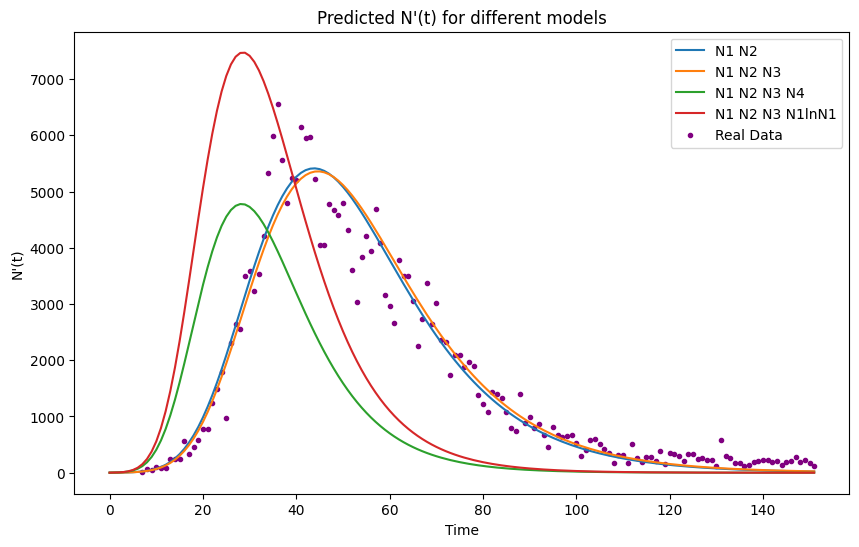

In [55]:
t_values = np.arange(len(italy_df['New_cases']))

# Compute N_prime_func for each model
plt.figure(figsize=(10, 6))
N0=3
for i, row in model_df.iterrows():
    N_prime_values = N_prime_func(t_values, row['epsilon'], row['alpha_1'], row['alpha_2'], N0=1)
    plt.plot(t_values, N_prime_values, label=row['instruments'])

# Load real data (replace with actual dataset)
# Assuming real data is a DataFrame with columns: 'time' and 'N_prime_real'

# Plot real data
plt.scatter(t_values, italy_df['New_cases'], label='Real Data', marker='.', color='purple')

plt.xlabel('Time')
plt.ylabel('N\'(t)')
plt.title('Predicted N\'(t) for different models')
plt.legend()
plt.show()